In [1]:
import qutip_tensornetwork as qtn
from qutip_tensornetwork.core.data import Network, FiniteTT
import qutip
import tensornetwork as tn
import numpy as np

This notebook shows how to work with the `FiniteTT` class that represents tensor trains. Note that, although the `FiniteTT` class inherits from `Network`, it still does not fully integrate within QuTiP. For the creation of finite tensor trains, it sufficess to provide the edges of the network. This will be contracted and then factored into a tensor train. The following notebook cells show how to create the tensor train and some of its properties.

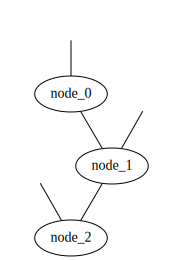

In [2]:
node = tn.Node(np.random.random((2,2,2))) # Single node with three edges
mps = FiniteTT(node[:], [])
mps # Input node gets factored into a tensor train with three nodes
# Note that nodes are already named for clarity

In [3]:
# The ndodes from a tensor train can be accessed with `train_nodes` property
mps.train_nodes[0]

Node
(
name : 'node_0',
tensor : 
array([[-0.99565576, -0.35989249],
       [-0.66606483,  0.5379792 ]]),
edges : 
[
Edge(Dangling Edge)[0] 
, 
Edge('node_0'[1] -> 'node_1'[1] )
] 
)

In [4]:
# Bond edges can also be accessed with the `bond_edges` property
mps.bond_edges

[
 Edge('node_0'[1] -> 'node_1'[1] ),
 
 Edge('node_1'[2] -> 'node_2'[1] )]

In [5]:
# Bond dimensions can be accessed with `bodn_dimension` property
mps.bond_dimension

[2, 2]

In [6]:
# Besides naming the nodes in the tensor train, axes of the nodes are also named. 
# It is possible to get the edges using the following keys: {"in", "out", "rbond", "lbond"}
assert mps.train_nodes[0]["rbond"] == mps.train_nodes[1]["lbond"]
mps.train_nodes[0]["out"]


Edge(Dangling Edge)[0] 

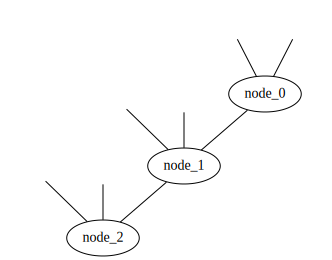

In [7]:
# Tensor trains can also be defined from a list of nodes
chi = 10
nodes = [np.random.random((2,2,10))]
nodes += [np.random.random((2,2,10,30))]
nodes += [np.random.random((2,2,30))]
nodes = [tn.Node(node) for node in nodes]
mpo = FiniteTT.from_nodes(nodes)
mpo.bond_dimension # 10, 10
mpo

#### Linear algebra operations.
Currently there is only one linear algebra operation implemented: matrix multiplication. Unlike for networks, matrix multiplication between tensor trains contracts the involved edges to keep the result as a tensor train. This leads to an increase in the bond dimension. The resulting bond dimension is the product of the operand's bond dimension.

[10, 30]
[2, 2]
[20, 60]


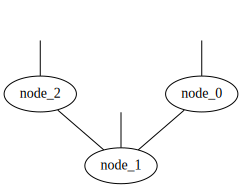

In [8]:
print(mpo.bond_dimension)  # [10, 30]
print(mps.bond_dimension)  # [2, 2]
result = mpo@mps
print(result.bond_dimension) # [20, 60]
result

We can check that the result is correct by performing the same operations with the corresponding matrix representation of the tensor trains.

In [9]:
result_matrix = mpo.to_array()@mps.to_array()
np.abs(result_matrix-result.to_array()).sum()

2.5579538487363607e-13

#### Truncation
Repeated matrix multiplication of a MPO times a MPS leads to increasingly large bond dimensions. It is common to truncate them to keep the resulting MPS's bond dimension manageable. It qutip-tensornetwork this is done with the truncate method. This performs a series of SVD truncations on every tensor in the tensor train keeping the only the larges singular values.

In [10]:
result.truncate(2)
result.bond_dimension

[2, 2]

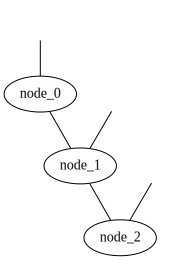

In [11]:
result